<a href="https://colab.research.google.com/github/dansecret/ProjectCapstone/blob/main/ProjectCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tempfile
import keras 
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
from keras.preprocessing import image

In [4]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
! kaggle datasets download -d techsash/waste-classification-data

 99% 424M/427M [00:04<00:00, 95.5MB/s]
100% 427M/427M [00:04<00:00, 96.1MB/s]


In [11]:
! unzip waste-classification-data.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.j

In [12]:
base_dir="/content/DATASET"
train_dir=os.path.join(base_dir,"TRAIN")
test_dir=os.path.join(base_dir,"TEST")

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=64,
                                                  class_mode='binary')

validation_generator=validation_datagen.flow_from_directory(test_dir,
                                                            target_size=(150,150),
                                                            batch_size=64,
                                                            class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [19]:
pretrain_1=InceptionV3(input_shape=(150,150,3),include_top=False,weights='imagenet')
for layer in pretrain_1.layers:
      layer.trainable = False
last_layer = pretrain_1.get_layer('mixed7')

In [20]:
pretrain_2=MobileNet(input_shape=(150,150,3),include_top=False,weights='imagenet')
for layers_1 in pretrain_2.layers:
  layers_1.trainable=False

17225924/17225924 [==============================] - 0s 0us/step


In [21]:
model = tf.keras.models.Sequential([
        # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [22]:
xx = layers.Flatten()(last_layer.output)
xx = layers.Dense(1024,activation='relu')(xx)
xx = layers.Dropout(0.2)(xx)
xx = layers.Dense(32, activation='sigmoid')(xx)
xx = layers.Dropout(0.2)(xx)
xx = layers.Dense(1, activation='sigmoid')(xx)

model_1 = Model(pretrain_1.input, xx)

In [23]:
model_2=tf.keras.models.Sequential([
                                    pretrain_2,
                                    tf.keras.layers.Dense(1,activation='relu'),
                                    tf.keras.layers.GlobalAveragePooling2D(),
                                    tf.keras.layers.Dense(1,activation='sigmoid')])

In [24]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self,epoch,logs={}):
        if((logs.get('accuracy')>0.85) and (logs.get('val_accuracy')>0.85)):
          self.model.stop_training = True

In [25]:
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model.fit(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=5,verbose=2,callbacks=myCallback())

Epoch 1/50
25/25 - 76s - loss: 1.0687 - accuracy: 0.5875 - val_loss: 0.4308 - val_accuracy: 0.8062 - 76s/epoch - 3s/step
Epoch 2/50
25/25 - 68s - loss: 0.5184 - accuracy: 0.7675 - val_loss: 0.3899 - val_accuracy: 0.8156 - 68s/epoch - 3s/step
Epoch 3/50
25/25 - 66s - loss: 0.4646 - accuracy: 0.7912 - val_loss: 0.3406 - val_accuracy: 0.8656 - 66s/epoch - 3s/step
Epoch 4/50
25/25 - 66s - loss: 0.4692 - accuracy: 0.8062 - val_loss: 0.3726 - val_accuracy: 0.8438 - 66s/epoch - 3s/step
Epoch 5/50
25/25 - 68s - loss: 0.4695 - accuracy: 0.7994 - val_loss: 0.3570 - val_accuracy: 0.8906 - 68s/epoch - 3s/step
Epoch 6/50
25/25 - 66s - loss: 0.4205 - accuracy: 0.8244 - val_loss: 0.3593 - val_accuracy: 0.8625 - 66s/epoch - 3s/step
Epoch 7/50
25/25 - 65s - loss: 0.4230 - accuracy: 0.8075 - val_loss: 0.3095 - val_accuracy: 0.8656 - 65s/epoch - 3s/step
Epoch 8/50
25/25 - 72s - loss: 0.4085 - accuracy: 0.8281 - val_loss: 0.2971 - val_accuracy: 0.8969 - 72s/epoch - 3s/step
Epoch 9/50
25/25 - 70s - loss: 0

In [26]:
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model_1.fit(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=5,verbose=2,callbacks=myCallback())

Epoch 1/50
25/25 - 125s - loss: 0.4130 - accuracy: 0.8200 - val_loss: 0.3898 - val_accuracy: 0.8094 - 125s/epoch - 5s/step
Epoch 2/50
25/25 - 114s - loss: 0.3058 - accuracy: 0.8798 - val_loss: 0.3885 - val_accuracy: 0.8500 - 114s/epoch - 5s/step


In [27]:
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model_2.fit(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=5,verbose=2,callbacks=myCallback())

Epoch 1/50
25/25 - 53s - loss: 0.6978 - accuracy: 0.5675 - val_loss: 0.6900 - val_accuracy: 0.6500 - 53s/epoch - 2s/step
Epoch 2/50
25/25 - 46s - loss: 0.6300 - accuracy: 0.6737 - val_loss: 0.6046 - val_accuracy: 0.7906 - 46s/epoch - 2s/step
Epoch 3/50
25/25 - 46s - loss: 0.5629 - accuracy: 0.7672 - val_loss: 0.5631 - val_accuracy: 0.7969 - 46s/epoch - 2s/step
Epoch 4/50
25/25 - 49s - loss: 0.5246 - accuracy: 0.8188 - val_loss: 0.5280 - val_accuracy: 0.8562 - 49s/epoch - 2s/step
Epoch 5/50
25/25 - 48s - loss: 0.5221 - accuracy: 0.8325 - val_loss: 0.5201 - val_accuracy: 0.8531 - 48s/epoch - 2s/step
Epoch 6/50
25/25 - 50s - loss: 0.4934 - accuracy: 0.8587 - val_loss: 0.4884 - val_accuracy: 0.8844 - 50s/epoch - 2s/step


Saving WhatsApp Image 2023-05-12 at 21.46.41.jpeg to WhatsApp Image 2023-05-12 at 21.46.41.jpeg
1/1 [==============================] - 0s 138ms/step
Anorganik
[[0.13000275]]


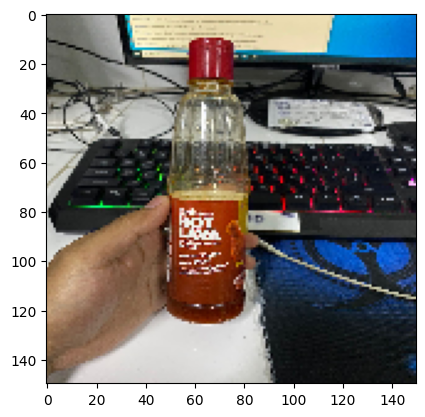

In [51]:
uploaded = files.upload()                                                         

for fn in uploaded.keys():

  path = fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))                             
  imgplot = plt.imshow(img)                                                       
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes_1=model_1.predict(images,batch_size=10)
  
  if classes==0:
    classes="Organik"
  else:
    classes="Anorganik"


  print(classes)
  print(classes_1)

In [40]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [41]:
tf.saved_model.save(model,"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial")
tf.saved_model.save(model_1,"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3")
tf.saved_model.save(model_2,"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet")

In [42]:
# Convert the model
Model_InceptionV3 = r"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3"
# Convert the model
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(Model_InceptionV3) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' 

In [43]:
# Convert the model
Model_MobileNet = r"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet"
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(Model_MobileNet) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('Model_MobileNet.tflite', 'wb') as f:
  f.write(tflite_model)

Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' 

In [36]:
# Convert the model
Model_Sequensial = r"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial"
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(Model_Sequensial) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('Model_Sequensial.tflite', 'wb') as f:
  f.write(tflite_model)

Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' 